In [1]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/IS_LR4')

In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
 raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [10]:
# загрузка датасета
from keras.datasets import imdb
vocabulary_size = 5000
index_from = 3
(X_train, y_train), (X_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=vocabulary_size,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=35,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=index_from
                                                      )
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

Shape of X train: (25000,)
Shape of y train: (25000,)
Shape of X test: (25000,)
Shape of y test: (25000,)


In [12]:
# создание словаря для перевода индексов в слова
# заргузка словаря "слово:индекс"
word_to_id = imdb.get_word_index()
# уточнение словаря
word_to_id = {key:(value + index_from) for key,value in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3
# создание обратного словаря "индекс:слово"
id_to_word = {value:key for key,value in word_to_id.items()}

review_indices = X_train[19]
print("Review - index:\n", review_indices)

review_text = " ".join(id_to_word.get(i, "?") for i in review_indices)
print("\nReview - text:\n", review_text)

print("\nReview length:", len(review_indices))

label = y_train[19]
class_name = "Positive" if label == 1 else "Negative"
print("Class label:", label, "| Class name:", class_name)

Review - index:
 [1, 608, 50, 26, 84, 37, 144, 24, 67, 14, 20, 10, 10, 300, 92, 67, 12, 48, 25, 92, 40, 2006, 42, 328, 1285, 241, 92, 40, 12, 48, 25, 188, 4154, 34, 4, 2, 342, 92, 67, 12, 48, 25, 181, 6, 622, 3783, 20, 10, 10, 4, 360, 7, 25, 521, 92, 1135, 8, 67, 736, 349, 45, 163, 45, 2812, 45, 6, 1917, 2, 7, 175, 78, 3783, 4896, 573, 8, 132, 2552, 2, 83, 4715, 312, 1285, 92, 2457, 4, 3028, 11, 3850, 364, 1317, 253, 7, 2, 2, 1022, 4106, 5, 4391, 2, 17, 73, 17, 6, 378, 7, 1139, 4139, 531, 34, 2, 3409, 5, 2, 2, 52, 8, 67, 4841, 2, 397, 157, 99, 13, 1498, 32, 4, 96, 143, 1254, 2, 643, 916, 21, 52]

Review - text:
 <START> ok there are people who should not see this movie br br 1 don't see it if you don't like satire or black humour 2 don't like it if you got offended by the <UNK> 3 don't see it if you want a serious superhero movie br br the rest of you run don't walk to see mystery men it's funny it's quirky it's a delightful <UNK> of every bad superhero cliche known to man occasional <

In [13]:
print("Max review length:", len(max(X_train, key=len)))
print("Min review length:", len(min(X_train, key=len)))

Max review length: 2494
Min review length: 11


In [14]:
# предобработка данных
from tensorflow.keras.utils import pad_sequences
max_words = 500
X_train = pad_sequences(X_train, maxlen=max_words, value=0, padding='pre', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_words, value=0, padding='pre', truncating='post')

In [15]:
print("Max review length:", len(max(X_train, key=len)))
print("Min review length:", len(min(X_train, key=len)))

Max review length: 500
Min review length: 500


In [16]:
review_indices = X_train[19]
print("Review - index:\n", review_indices)

review_text = " ".join(id_to_word.get(i, "?") for i in review_indices)
print("\nReview - text:\n", review_text)

print("\nReview length:", len(review_indices))

label = y_train[19]
class_name = "Positive" if label == 1 else "Negative"
print("Class label:", label, "| Class name:", class_name)

Review - index:
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0

In [21]:
print("Preprocessed training set X_train (first 3 examples):")
print(X_train[:3])

print("\nPreprocessed training set X_test (first 3 examples):")
print(X_test[:3])


print("Size of X_train:", X_train.shape)
print("Size of y_train:", y_train.shape)
print("Size of X_test:", X_test.shape)
print("Size of y_test:", y_test.shape)

Preprocessed training set X_train (first 3 examples):
[[   0    0    0 ...    8  591 1462]
 [   0    0    0 ...   28   35  585]
 [   0    0    0 ...   11    2    2]]

Preprocessed training set X_test (first 3 examples):
[[  0   0   0 ...  14 356  22]
 [  0   0   0 ... 301  87  22]
 [  0   0   0 ...  46   7 158]]
Size of X_train: (25000, 500)
Size of y_train: (25000,)
Size of X_test: (25000, 500)
Size of y_test: (25000,)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense


model = Sequential()
model.add(Embedding(
    input_dim=vocabulary_size + index_from,
    output_dim=32,
    input_length=max_words
))
model.add(LSTM(67))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.build(input_shape=(None, max_words))
model.summary()

# Обучение модели
history = model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 500, 32)        │       160,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 67)             │        26,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 67)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 186,964 (730.33 KB)

 Trainable params: 186,964 (730.33 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.6426 - loss: 0.6635 - val_accuracy: 0.6048 - val_loss: 0.6939
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.5151 - loss: 0.7202 - val_accuracy: 0.6084 - val_loss: 0.6766
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5620 - loss: 0.6804 - val_accuracy: 0.7786 - val_loss: 0.5682
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.7489 - loss: 0.5362 - val_accuracy: 0.7468 - val_loss: 0.5106
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.8451 - loss: 0.3959 - val_accuracy: 0.8556 - val_loss: 0.3406


In [23]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("Classification results")
print(f"Test accuracy: {test_accuracy:.4f}")

Classification results
Test accuracy: 0.8519


In [24]:
y_score = model.predict(X_test)
y_pred = [1 if y_score[i,0]>=0.5 else 0 for i in range(len(y_score))]
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels = [0, 1], target_names=['Negative', 'Positive']))

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step
              precision    recall  f1-score   support

    Negative       0.85      0.86      0.85     12500
    Positive       0.85      0.85      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



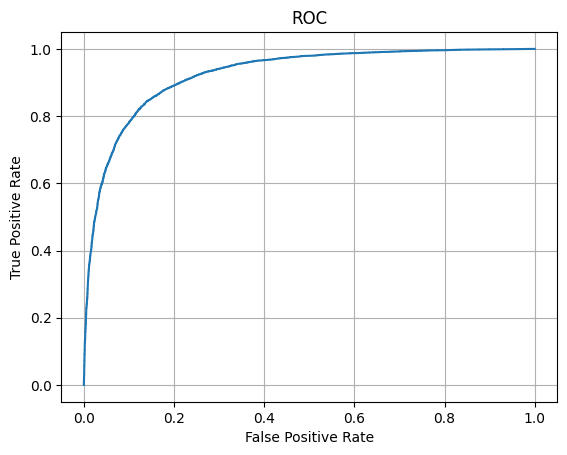

Area under ROC is 0.925042592


In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_score)
plt.plot(fpr, tpr)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under ROC is', auc(fpr, tpr))